<a href="https://colab.research.google.com/github/TinozgDominic/AI2022/blob/main/MLP/MLP_Cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [ ]:
from keras.datasets import cifar100

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

print(f'Input shape: {x_train[0].shape}')
print(f'Output shape: {y_train[0].shape}')
print(f'Train size: {len(x_train)}')
print(f'Test size: {len(x_test)}')

Input shape: (32, 32, 3)
Output shape: (1,)
Train size: 50000
Test size: 10000


In [ ]:
x_train = tf.image.rgb_to_grayscale(x_train)
x_test = tf.image.rgb_to_grayscale(x_test)

print(f'Input shape: {x_train[0].shape}')

Input shape: (32, 32, 1)


In [ ]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(f'Output shape: {y_train[0].shape}')

Output shape: (100,)


In [ ]:
model = models.Sequential()

model.add(Flatten(input_shape = [32,32,1]))
model.add(layers.Dense(1000, activation = 'relu'))
model.add(layers.Dense(1000, activation = 'relu'))
model.add(layers.Dense(1000, activation = 'relu'))
model.add(layers.Dense(100, activation = 'softmax'))

model.summary()



Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 1024)              0         
                                                                 
 dense_30 (Dense)            (None, 1000)              1025000   
                                                                 
 dense_31 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_32 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_33 (Dense)            (None, 100)               100100    
                                                                 
Total params: 3,127,100
Trainable params: 3,127,100
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, Callback

callbacks = [Callback(), 
            EarlyStopping(patience=21, verbose=1),
            ReduceLROnPlateau(patience=5, verbose=1),
            ModelCheckpoint('MLP_Cifar100.h5', verbose=1, save_best_only=True)]

In [ ]:
model.fit(x_train, y_train, 
          epochs = 100, 
          batch_size = 200,
          validation_data = (x_test, y_test), 
          callbacks = callbacks)

Epoch 1/100
250/250 [==============================] - ETA: 0s - loss: 21.8585 - accuracy: 0.0108
Epoch 1: val_loss improved from inf to 4.59074, saving model to MLP_Cifar100.h5
250/250 [==============================] - 24s 95ms/step - loss: 21.8585 - accuracy: 0.0108 - val_loss: 4.5907 - val_accuracy: 0.0130 - lr: 0.0010
Epoch 2/100
250/250 [==============================] - ETA: 0s - loss: 4.5682 - accuracy: 0.0172
Epoch 2: val_loss improved from 4.59074 to 4.55232, saving model to MLP_Cifar100.h5
250/250 [==============================] - 23s 91ms/step - loss: 4.5682 - accuracy: 0.0172 - val_loss: 4.5523 - val_accuracy: 0.0218 - lr: 0.0010
Epoch 3/100
250/250 [==============================] - ETA: 0s - loss: 4.4919 - accuracy: 0.0282
Epoch 3: val_loss improved from 4.55232 to 4.47037, saving model to MLP_Cifar100.h5
250/250 [==============================] - 23s 92ms/step - loss: 4.4919 - accuracy: 0.0282 - val_loss: 4.4704 - val_accuracy: 0.0304 - lr: 0.0010
Epoch 4/100
250/250 [

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random



print('Predict:', np.argmax(model.predict(x_test[show])))
print('True mask:' ,np.argmax(y_test[show]))

plt.imshow(tf.reshape(x_test[show],[32,32]))
plt.show()

1/1 [==============================] - 0s 57ms/step
Predict: 44
True mask: 57


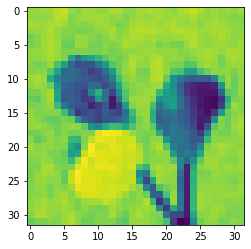

In [ ]:
show = random.randint(0,9999)

print('Predict:', np.argmax(model.predict(x_test[show])))
print('True mask:' ,np.argmax(y_test[show]))

plt.imshow(tf.reshape(x_test[show],[32,32]))
plt.show()